##### This notebook will generate the figure for Panel A: frequency of CH01-like precursors in the OAS database

## 1. Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import math
import random

In [2]:
pwd

'/Users/ssolieva/Desktop/github_repo/bnab_search/figures/notebooks'

## 2. import the frequency counts

In [3]:
# path to frequency count files
path = '/Users/ssolieva/Desktop/Kulp_lab/projects/OAS_database_searches/'

In [4]:
# searches to graph 
graph_list = ['expanded_search_11O', 'expanded_search_12O', 
              'expanded_search_5O','expanded_search_6O','expanded_search_1O',
              'expanded_search_2O', 'expanded_search_2O_noVgene']

In [5]:
frequency_lists = []
list_names = []
for i in graph_list:
    file = np.load(f'{path}frequency_counts/CH01_CH04_{i}.npy')
    frequency_lists.append(file)
    list_names.append(f'{i}')
print(list_names)

['expanded_search_11O', 'expanded_search_12O', 'expanded_search_5O', 'expanded_search_6O', 'expanded_search_1O', 'expanded_search_2O', 'expanded_search_2O_noVgene']


## 3. Plot Panel A, frequency plot

    Add in averages across the donors that have CH01-like precursors
        Essentially just an average of the points plotted on the graph

2 donors
17 donors
8 donors
77 donors
21 donors
122 donors
146 donors


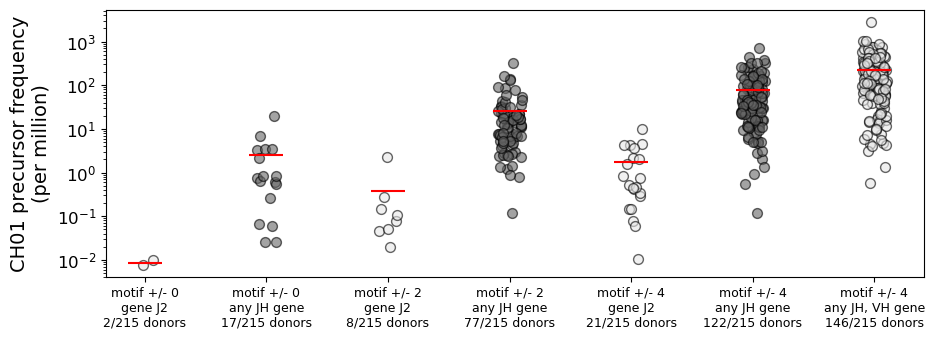

In [6]:
# Make a list of random x values for plotting the averages
x_values = []
for i in range(len(graph_list)):
    x_values.append(random.uniform(0,0.2))
    
# calculate the averages to plot them
frequency_avgs = []
for i in range(len(graph_list)):
    frequency_avgs.append(np.average(frequency_lists[i]))

# plot
plt.figure(figsize=[9.5,3.5])
list_c = ['0.9','0.4','0.9','0.4','0.9','0.4','0.9','0.4']
list_plot = [0,1,2,3,4,5,6]
for i in range(len(list_plot)):    
    x_values = []
    for p in range(len(frequency_lists[list_plot[i]])):
        x_values.append(random.uniform(0,0.2))
    print(len(x_values), "donors")
    x_vals = np.array(x_values)
    plt.scatter(x_vals+i, frequency_lists[list_plot[i]], color=list_c[i], alpha=0.6, edgecolors='k', s=50)
    plt.scatter(0+i+0.1, frequency_avgs[list_plot[i]], marker='_', s=600, color='r')
list_names = [f'motif +/- 0\ngene J2\n{len(frequency_lists[0])}/215 donors', f'motif +/- 0\nany JH gene\n{len(frequency_lists[1])}/215 donors',
              f'motif +/- 2\ngene J2\n{len(frequency_lists[2])}/215 donors', f'motif +/- 2\nany JH gene\n{len(frequency_lists[3])}/215 donors',
              f'motif +/- 4\ngene J2\n{len(frequency_lists[4])}/215 donors', f'motif +/- 4\nany JH gene\n{len(frequency_lists[5])}/215 donors',
              f'motif +/- 4\nany JH, VH gene\n{len(frequency_lists[6])}/215 donors']
plt.yscale("log")     
plt.xticks(np.array(np.arange(len(list_names)))+0.1, list_names, rotation = 0, fontsize=9)
plt.ylabel("CH01 precursor frequency\n(per million)", fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("../PanelA_frequency_per_donor.png", dpi=500)
plt.show()

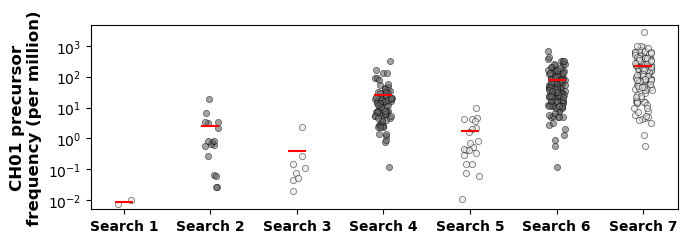

In [50]:
# final plot

line_size = 150 #50
dot_size = 20 # 600
xtick_size = 10 #12
ytick_size = 10
label_size = 12

# plot with different x tick names
plt.figure(figsize=[7,2.5]) # 7.5, 3.5
for i in range(len(list_plot)):    
    x_values = []
    for p in range(len(frequency_lists[list_plot[i]])):
        x_values.append(random.uniform(0,0.2))
    #print(len(x_values), "donors")
    x_vals = np.array(x_values)
    plt.scatter(x_vals+i, frequency_lists[list_plot[i]], color=list_c[i], alpha=0.6, edgecolors='k', s=dot_size, linewidths=0.5)
    plt.scatter(0+i+0.1, frequency_avgs[list_plot[i]], marker='_', s=line_size, color='r',linewidths=1)
list_names = ['Search 1', 'Search 2', 'Search 3', 'Search 4', 'Search 5', 'Search 6','Search 7']
plt.yscale("log")     
plt.xticks(np.array(np.arange(len(list_names)))+0.1, list_names, rotation = 0, fontsize=xtick_size, weight='bold')
plt.ylabel("CH01 precursor\nfrequency (per million)", fontsize=label_size, weight='bold')
plt.yticks([0.001,0.01,0.1,1,10,100,1000,10000],fontsize=ytick_size)
plt.ylim(0.005,5000)
plt.tight_layout()
plt.savefig("../PanelA_frequency_per_donor_search_n_larger_text.png", dpi=300, transparent=True)
plt.show()